In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import scipy.spatial.distance as spd
import sklearn.datasets as dt
from sklearn import metrics as mt
import pickle as pk

# Métricas de Distâncias 
# Classificadores Baseados em Distâncias

# Video 2 : Matrizes de Distâncias

In [21]:

fname = '../../lab/LAB2/LAB2distancias001.p'
D = pk.load(open(fname, 'rb'))
D.keys()

dict_keys(['X', 'idxClass'])

In [22]:
X = D['X']
y = D['idxClass']
print(X.shape)
print(y.shape)

(2, 2000)
(2000,)


[1. 2. 3.]


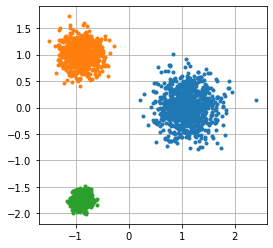

In [29]:
plt.plot(X[0,y==1], X[1,y==1], '.')
plt.plot(X[0,y==2], X[1,y==2], '.')
plt.plot(X[0,y==3], X[1,y==3], '.')

plt.axis('scaled')
plt.grid()
print(np.unique(y)) # as classes são 1, 2 e 3

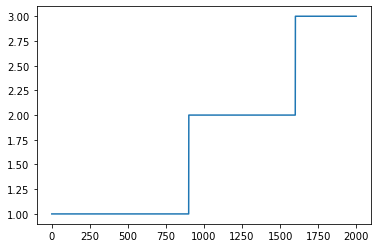

In [27]:
plt.plot(y) # ordens dos dados

(2000, 2000)


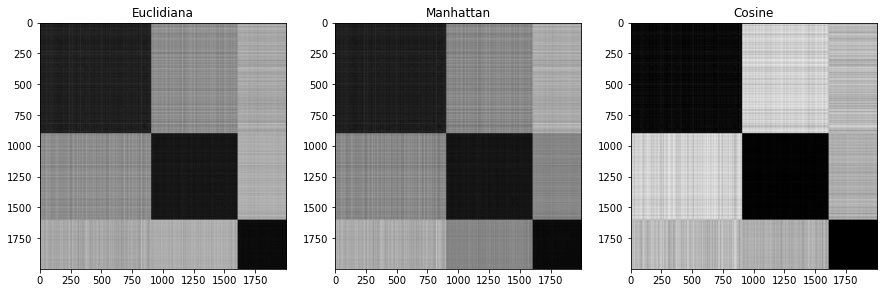

In [42]:
# Calcular matizes de distancia
# help(spd.pdist)

# o python apenas a diagonal e a parte de cima para poupar memoria
# D2 = spd.pdist(X.T, 'euclidean')


D2 = spd.squareform(spd.pdist(X.T, 'euclidean')) # obtento a matriz no formado real
D1 = spd.squareform(spd.pdist(X.T, 'cityblock')) # obtento a matriz no formado real
Dc = spd.squareform(spd.pdist(X.T, 'cosine')) # obtento a matriz no formado real

print(D2.shape)


plt.figure(figsize=(15,30))


plt.subplot(131)
plt.imshow(D2, cmap='gray')
plt.title('Euclidiana')

plt.subplot(132)
plt.imshow(D1, cmap='gray')
plt.title('Manhattan')

plt.subplot(133)
plt.imshow(Dc, cmap='gray')
plt.title('Cosine')
plt.show()

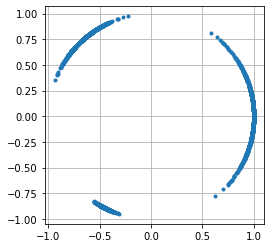

In [45]:
# Distancia cosseno
nx = np.sqrt(np.sum(X**2, axis=0)) # pegar cada ponto normalizado 
Xn = X/nx
plt.plot(Xn[0,:], Xn[1,:], '.')
plt.axis('scaled')
plt.grid(True)

Text(0.5, 1.0, 'Cosine Minha')

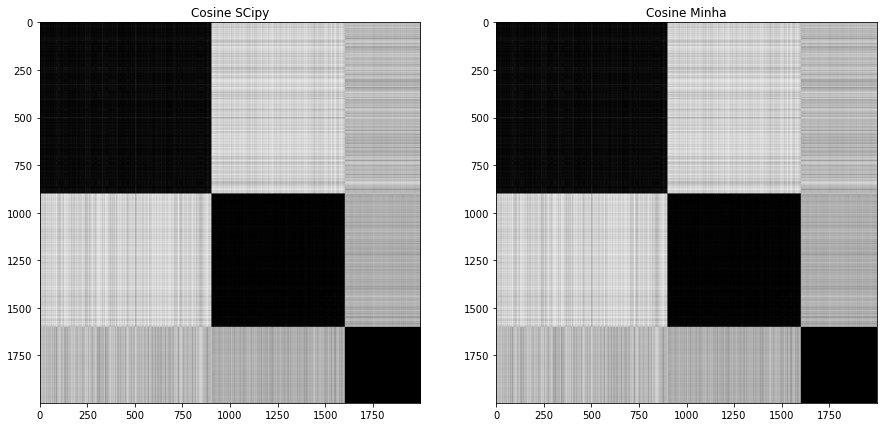

In [49]:
Dc2 = 1 - np.dot(Xn.T, Xn)

plt.figure(figsize=(15,30))
plt.subplot(121)
plt.imshow(Dc, cmap='gray')
plt.title('Cosine SCipy')

plt.subplot(122)
plt.imshow(Dc2, cmap='gray')
plt.title('Cosine Minha')

In [51]:
print(Dc[:3, :3])
print(Dc2[:3, :3]) # igualdade entre matrizes ignorando arredondamentos

[[0.         0.02685195 0.05020918]
 [0.02685195 0.         0.00369288]
 [0.05020918 0.00369288 0.        ]]
[[-2.22044605e-16  2.68519488e-02  5.02091775e-02]
 [ 2.68519488e-02  1.11022302e-16  3.69288067e-03]
 [ 5.02091775e-02  3.69288067e-03  0.00000000e+00]]


In [53]:
# Vídeo 3 : Classificadores baseados em distâncias
# MNIST -> conjunto de imagens (28,28) de manuscrito de digitos (1500 digitos)

fname = '../../lab/LAB2/MNISTsmall.p'

D = pk.load(open(fname, 'rb'))
D.keys()

# X -> Dados

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])

In [54]:
X = D['X']
X = X * 1.0 # fazer o cast para o array poder fazer operações sem cometer overflow
y = D['trueClass']
print(X.shape) # 784 linhas 15000 colunas
print(X.dtype)



(784, 15000)
float64


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


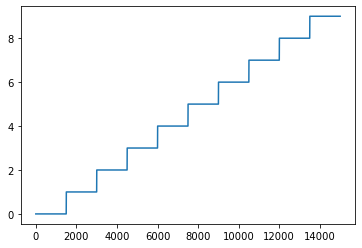

In [55]:
print(np.unique(y)) # verificar quais as classes
plt.plot(y) # verificar se as classes vem ordenadas


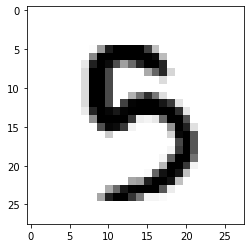

In [56]:
x = X[:, 7777]
plt.imshow(x.reshape((28,28)), cmap='binary')

In [61]:
Xb = X[:,y==0][:,:200]
print(Xb.shape)

for i in range(1, 10):

    Xtmp = X[:,y==i][:,:200]
    Xb = np.hstack((Xb, Xtmp))

print(Xb.shape)

(784, 200)
(784, 2000)


In [63]:
D2 = spd.squareform(spd.pdist(Xb.T, 'euclidean'))
D1 = spd.squareform(spd.pdist(Xb.T, 'cityblock'))
Dc = spd.squareform(spd.pdist(Xb.T, 'cosine'))

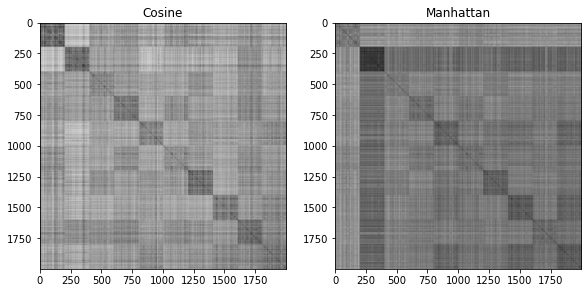

In [65]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.imshow(D2, cmap='gray')
plt.title('Euclidean')

plt.subplot(132)
plt.imshow(D1, cmap='gray')
plt.title('Manhattan')

plt.subplot(131)
plt.imshow(Dc, cmap='gray')
plt.title('Cosine')
plt.show()